In [49]:
import tensorflow as tf
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(gpus[0], True)
from tensorflow import keras
from tensorflow.keras.layers import *

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

2.6.0


In [50]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_train))

60000


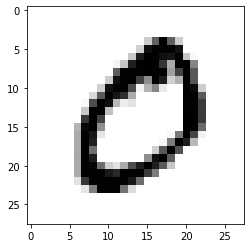

In [51]:
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()

In [52]:
print(y_train[1])

0


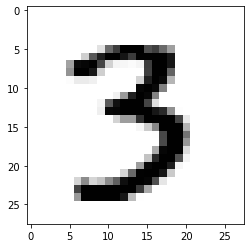

10001 번째 이미지의 숫자는 바로  3 입니다.


In [5]:
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [6]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


0~1의 범위로 정규화 진행

In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [10]:
model = keras.models.Sequential()
model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [11]:
print('Before Reshape - x_train_norm shape : {}'.format(x_train_norm.shape))
print('Before Reshape - x_test_norm shape : {}'.format(x_test_norm.shape))

Before Reshape - x_train_norm shape : (60000, 28, 28)
Before Reshape - x_test_norm shape : (10000, 28, 28)


In [12]:
x_train_reshape = x_train_norm.reshape(-1, 28,28, 1)
x_test_reshape = x_test_norm.reshape(-1, 28,28, 1)

In [13]:
print('After Reshape - x_train_reshape shape : {}'.format(x_train_reshape.shape))
print('After Reshape - x_test_reshape shape : {}'.format(x_test_reshape.shape))

After Reshape - x_train_reshape shape : (60000, 28, 28, 1)
After Reshape - x_test_reshape shape : (10000, 28, 28, 1)


In [16]:
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [17]:
model.fit(x_train_reshape, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1929 - accuracy: 0.9398
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0635 - accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0453 - accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0359 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0296 - accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0233 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0199 - accuracy: 0.9933
Epoch 8/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0139 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - ETA: 0s

In [20]:
test_loss, test_accuracy = model.evaluate(x_test_reshape, y_test, verbose =2 )
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

313/313 - 2s - loss: 0.0506 - accuracy: 0.9860
test_loss : 0.05064917728304863
test_accuracy : 0.9860000014305115


In [21]:
pred = model.predict(x_test_reshape)
label = np.argmax(pred, axis =1)

In [22]:
idx = 0
print('model.predict() 결과 : ', pred[idx])
print('model이 추론한 가장 가능성 높은 결과 :', label[idx])
print('실제 데이터의 라벨 :', y_test[idx])

model.predict() 결과 :  [1.7986645e-08 6.9215224e-12 9.1769827e-08 6.2804384e-07 6.8037957e-09
 9.3732765e-11 6.3415243e-19 9.9999905e-01 4.7784637e-10 2.1029172e-07]
model이 추론한 가장 가능성 높은 결과 : 7
실제 데이터의 라벨 : 7


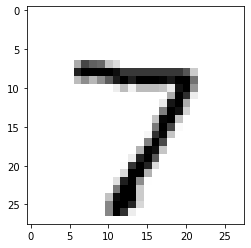

In [23]:
plt.imshow(x_test[idx], cmap = plt.cm.binary)
plt.show()

예측라벨분포 : [3.5694943e-09 8.4826590e-10 2.0849070e-07 2.6517394e-06 1.8876027e-07
 2.1476699e-11 1.6542753e-18 9.9999237e-01 4.5912293e-06 1.1657869e-08]
라벨 : 8
예측 결과 : 7


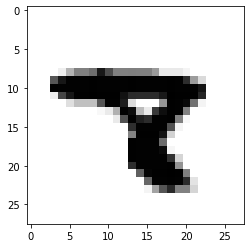

예측라벨분포 : [6.9703818e-03 2.0721431e-03 1.6732611e-03 4.6321136e-07 9.4401366e-01
 3.5839339e-06 1.1281427e-04 1.1891212e-04 1.4243982e-02 3.0790804e-02]
라벨 : 9
예측 결과 : 4


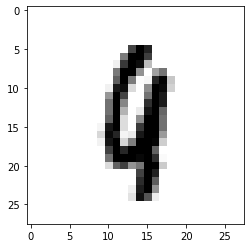

예측라벨분포 : [7.6329409e-10 5.6727639e-10 6.7726910e-01 1.2033221e-04 3.7745355e-08
 2.0657653e-10 6.6452280e-13 3.2261053e-01 8.4811148e-08 2.0978620e-12]
라벨 : 7
예측 결과 : 2


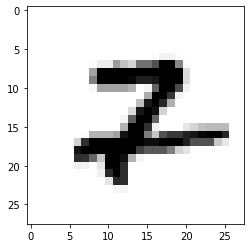

예측라벨분포 : [6.1442580e-15 3.5291839e-12 2.3293282e-11 3.8009921e-07 2.0515936e-08
 5.1717974e-10 1.0608307e-22 9.9989760e-01 1.0200709e-04 5.9247974e-08]
라벨 : 8
예측 결과 : 7


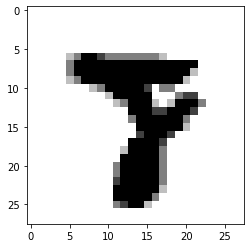

예측라벨분포 : [6.9703818e-03 2.0721431e-03 1.6732611e-03 4.6321136e-07 9.4401366e-01
 3.5839339e-06 1.1281427e-04 1.1891212e-04 1.4243982e-02 3.0790804e-02]
라벨 : 9
예측 결과 : 4


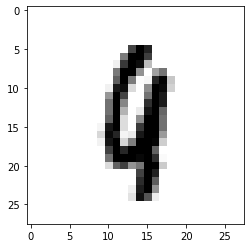

In [24]:
import random
wrong_predict_list = []
for i, _ in enumerate(label):
    if label[i] != y_test[i]:
        wrong_predict_list.append(i)
        
samples = random.choices(population = wrong_predict_list, k = 5)

for n in samples:
    print('예측라벨분포 :', str(pred[n]))
    print('라벨 :', str(y_test[n]))
    print('예측 결과 :', str(label[n]))
    plt.imshow(x_test[n], cmap = plt.cm.binary)
    plt.show()

In [26]:
n_channel_1= 32
n_channel_2 = 64
n_dense = 64
n_train_epoch = 10

model = keras.models.Sequential()
model.add(Conv2D(n_channel_1, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(n_channel_2, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(n_dense, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_reshape, y_train, epochs = n_train_epoch)

test_loss , test_accuracy = model.evaluate(x_test_reshape, y_test, verbose = 2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

train : loss: 0.0121 - accuracy: 0.9960 -> loss: 0.0074 - accuracy: 0.9977

validation : loss: 0.0506 - accuracy: 0.9860 -> loss: 0.0345 - accuracy: 0.9924